In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [51]:
df = pd.read_csv(r'D:\krish naik - udemy ML and Deep Learning\CampusX\Feature Engineering\titanic_train.csv',
                usecols = ['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [52]:
df.columns

Index(['Survived', 'Age', 'Fare'], dtype='object')

In [53]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [54]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [56]:
# To see the changes before and after imputation,creating duplicate column of the Age
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [57]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sam ple(X_test['Age'].isnull().sum()).values

C:\Users\porep\AppData\Local\Temp\ipykernel_22068\3090101260.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
C

In [69]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,30.0
493,71.0,49.5042,71.0
527,NaN,221.7792,4.0


C:\Users\porep\AppData\Local\Temp\ipykernel_22068\906687649.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],hist=False,label = 'Original')
C:\Users\porep\AppData\Local\Temp\ipykernel_22068\906687649.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[

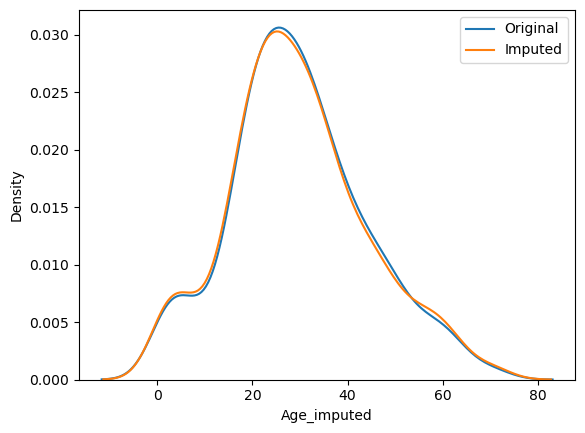

In [73]:
sns.distplot(X_train['Age'],hist=False,label = 'Original')
sns.distplot(X_train['Age_imputed'],hist = False,label ='Imputed')
plt.legend()
plt.show()

In [75]:
print("Original variable variance",X_train['Age'].var())
print("Variance after random imputation",X_train['Age_imputed'].var())

Original variable variance 204.3495133904614
Variance after random imputation 211.8791839528122


In [79]:
# Difference occurs in covariance while checking the relationship of missing data column with other columns in the dataset
X_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,46.012602
Age,71.512440,204.349513,204.349513
Age_imputed,46.012602,204.349513,211.879184


<Axes: >

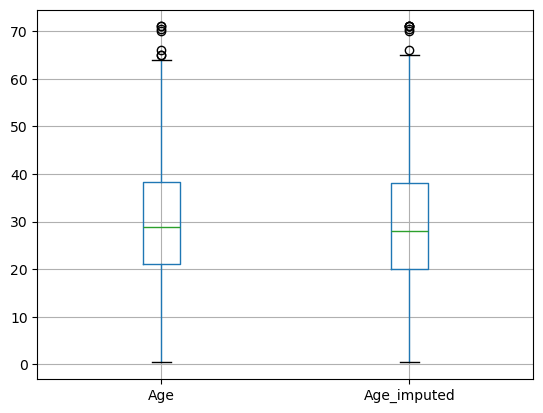

In [83]:
X_train[['Age','Age_imputed']].boxplot()

In [85]:
sampled_value = X_train['Age'].dropna().sample(1,random_state=int(observation['Fare']))

NameError: name 'observation' is not defined

#### Categorical column Random sample imputation

In [89]:
data = pd.read_csv(r'D:\krish naik - udemy ML and Deep Learning\CampusX\Feature Engineering\house_train.csv',
                   usecols=['GarageQual','FireplaceQu','SalePrice'])

In [91]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [93]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [95]:
X = data
y = data['SalePrice']

In [97]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [99]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [103]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
425,Gd,TA,135000,TA,Gd
1075,Gd,TA,219500,TA,Gd
209,NaN,TA,145000,TA,NaN
582,NaN,NaN,118500,NaN,NaN
225,NaN,TA,112000,TA,NaN


In [107]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\porep\AppData\Local\Temp\ipykernel_22068\856878696.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual

In [109]:
# Analysing whether the frequency with respect to entire data in the dataset before and after imputation is same or different
# if Frequency is changing then it is the matter of concern and not good
temp = pd.concat(
    [X_train['GarageQual'].value_counts()/len(X_train['GarageQual'].dropna()),
     X_train['GarageQual_imputed'].value_counts()/len(X_train)
    ],axis = 1)
temp.columns = ['Original','Imputed']

In [111]:
temp

,Original,Imputed
TA,0.951043,0.948630
Fa,0.037171,0.038527
Gd,0.009973,0.011130
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [133]:
temp = pd.concat(
    [X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
    X_train['FireplaceQu_imputed'].value_counts()/len(X_train)
    ],axis = 1)
temp.columns  = ['Original','Imputed']

In [135]:
temp

,Original,Imputed
Gd,0.494272,0.499144
TA,0.412439,0.407534
Fa,0.040917,0.041096
Po,0.027823,0.026541
Ex,0.024550,0.025685


In [131]:
len(X_train['FireplaceQu_imputed'])

1168

C:\Users\porep\AppData\Local\Temp\ipykernel_22068\2796840915.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist = False,label = category)
C:\Users\porep\AppData\Local\Temp\ipykernel_22068\2796840915.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974

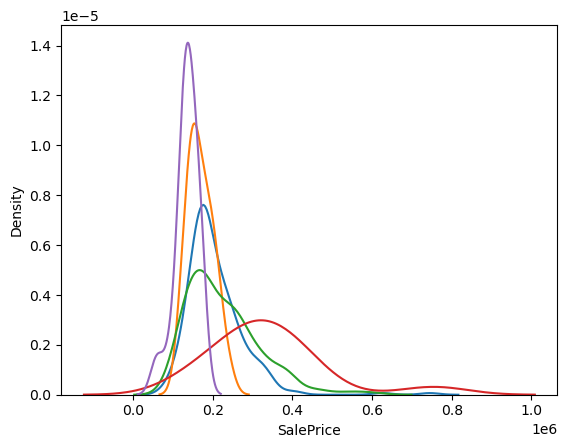

In [141]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist = False,label = category)

C:\Users\porep\AppData\Local\Temp\ipykernel_22068\320097731.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist = False,label=category)
C:\Users\porep\AppData\Local\Temp\ipykernel_22068\320097731.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed

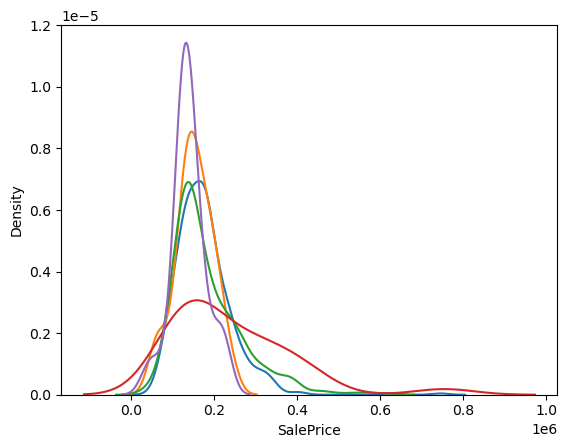

In [143]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist = False,label=category)

In [145]:
# It is not good when you are dealing with Linear Model Algorithms,as such changes in distribution of data,
# so if we were using Linear model algorithm, we should have not implemented random Sample Imputation on'FireplaceQu' column.
# As lot of data is missing so it is a headache filling huge number using Random Sample Imputation

#### Missing Indicator

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer , MissingIndicator

In [9]:
df = pd.read_csv(r'D:\krish naik - udemy ML and Deep Learning\CampusX\Feature Engineering\titanic_train.csv',usecols=['Age','Fare','Survived'])

In [11]:
df.sample(5)

,Survived,Age,Fare
384,0,NaN,7.8958
702,0,18.0,14.4542
195,1,58.0,146.5208
514,0,24.0,7.4958
430,1,28.0,26.5500


In [17]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [21]:
X_train.head()

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458


#### Checking Accuracy using Simple Mean Imputer

In [25]:
si = SimpleImputer()
X_train_trf = si.fit_transform(X_train)
X_test_trf = si.transform(X_test)

In [27]:
# Transform into numpy array after using Simple Imputer
X_train_trf

array([[ 40.        ,  27.7208    ],
       [  4.        ,  16.7       ],
       [ 47.        ,   9.        ],
       ...,
       [ 71.        ,  49.5042    ],
       [ 29.78590426, 221.7792    ],
       [ 29.78590426,  25.925     ]])

In [29]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_trf,y_train)

LogisticRegression()

In [33]:
y_pred = clf.predict(X_test_trf)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6145251396648045

#### Using Missing Indicator concept to check the Accuracy

In [40]:
mi = MissingIndicator()
mi.fit(X_train)

MissingIndicator()

In [44]:
mi.features_ # Column index no in which we have missing values

array([0], dtype=int64)

In [46]:
# New column is created of the original existing column where we have missing values and replaced missing records with True
X_train_missing = mi.transform(X_train)

In [50]:
#  New column is created of the original existing column where we have missing values and replaced missing records with True
X_test_missing = mi.transform(X_test)

In [52]:
X_train['Age_NA'] = X_train_missing
X_test['Age_NA'] = X_test_missing

In [54]:
# Applying Simple Imputer on Age column of Both train and test dataset
si = SimpleImputer()
X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)

In [56]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_trf2,y_train)
y_pred = clf.predict(X_test_trf2)

In [58]:
accuracy_score(y_test,y_pred)

0.6312849162011173

### Performing Missing indicator Task using Simple Imputer class

In [61]:
# parameter add_indicator = True
si = SimpleImputer(add_indicator=True)
X_train_trf3 = si.fit_transform(X_train)
X_test_trf3 = si.transform(X_test)

In [63]:
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression()
clf.fit(X_train_trf3,y_train)
y_pred = clf.predict(X_test_trf3)
accuracy_score(y_test,y_pred)

0.6312849162011173